In [45]:
import numpy as np 
import scipy, sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # из модуля preprocessing библиотеки sklearn имрорт функциии StandardScaler
from matplotlib import pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression # импорт из модуля linear_model функцию для создания модели линейной регресии
import datetime
from sklearn.metrics import mean_squared_error  # импорт метрик для оценки данных


In [46]:
print(np.__version__)
print(scipy.__version__)
print(sklearn.__version__)
print(matplotlib.__version__)

1.24.2
1.11.4
1.4.0
3.7.1


In [47]:
import pandas as pd

df = pd.read_csv('time_messagees.txt', sep=',')

In [48]:
print(df)

           time  count_messages
0      00:00:00             0.0
1      00:00:01             1.0
2      00:00:02             0.0
3      00:00:03             6.0
4      00:00:04             7.0
...         ...             ...
86391  23:59:51             0.0
86392  23:59:52             0.0
86393  23:59:53             3.0
86394  23:59:54             1.0
86395  23:59:55             1.0

[86396 rows x 2 columns]


In [49]:
df.dtypes

time               object
count_messages    float64
dtype: object

In [50]:
X = df['time'] # столбец с целевой переменной target (вектор)
y = df['count_messages'] # признак

In [51]:
X = pd.to_datetime(df['time'], format='%H:%M:%S')

In [52]:
X = ((X.dt.hour*60+X.dt.minute)*60 + X.dt.second).to_frame()

In [53]:
#Стандартизация данных перед работой с алгоритмами:
sc = StandardScaler()  # Создание объекта стандартизатора
X_c = sc.fit_transform(X)  # # Применение стандартизации к признакам X и сохранение результата в X_c

In [54]:
# Разделение выборки на тренировочный и валидационный наборы с
# помощью train_test_split, X- признак, y – целевой признак,

X_train,X_valid,y_train,y_valid = train_test_split(X_c,
                                                   y,
                                                   test_size=0.25,
                                                   random_state=0)


In [55]:
X_c

array([[-1.73203076],
       [-1.73199066],
       [-1.73195057],
       ...,
       [ 1.73195057],
       [ 1.73199066],
       [ 1.73203076]])

In [56]:
model = LinearRegression()  # инициализирование модели LinearRegression
model.fit(X_train, y_train)  # обучение модели на тренировочной выборке

LinearRegression()

In [57]:
# получение коэффициента регрессии
a_model = model.coef_
b_model = model.intercept_
print(f'a: {a_model}')
print(f'b: {b_model}')

a: [1.26318963]
b: 10.571872833818473


In [58]:
# В простой линейной регрессии предсказания (predictions) являются оценками целевой переменной на основе входных признаков
# После обучения модели LinearRegression на тренировочной выборке с помощью метода fit(), используется метод predict() 
# для получения предсказаний модели на валидационной выборке.

In [59]:
predictions_valid = model.predict(np.array(X_valid).reshape(-1,1)) # предсказания модели на валидационной выборке

In [60]:
predictions_valid

array([10.11236543, 11.94406401,  9.48665537, ..., 11.32377333,
       10.7206018 ,  9.49126437])

In [61]:
df_match = pd.DataFrame({'Actual': y_valid, 'Predicted': predictions_valid}) # датафрейм для сравнения предсказанных значений и реальных

In [62]:
df_match

,Actual,Predicted
34125,3.0,10.112365
70290,3.0,11.944064
21771,61.0,9.486655
14750,0.0,9.131053
2005,2.0,8.485540
...,...,...
77792,8.0,12.324028
72567,6.0,12.059390
58043,2.0,11.323773
46134,55.0,10.720602


In [63]:
df_match.reset_index(drop= True)  # сброс индексации

,Actual,Predicted
0,3.0,10.112365
1,3.0,11.944064
2,61.0,9.486655
3,0.0,9.131053
4,2.0,8.485540
...,...,...
21594,8.0,12.324028
21595,6.0,12.059390
21596,2.0,11.323773
21597,55.0,10.720602


In [64]:
print('Mean Squared Error:', mean_squared_error(y_valid, predictions_valid))  # Расчет среднеквадратической ошибки (MSE)

Mean Squared Error: 367.11476560214453


In [65]:
# MSE: Чем меньшее у модели значение среднеквадратической ошибки, тем меньше грубых ошибок. Данная метрика отражает влияние именно больших ошибок на качество модели. 
# Однако, если на одном или нескольких неудачных примерах, возможно, содержащих аномальные значения(выбросы) будет допущена значительная ошибка, то возведение в квадрат приведёт к ложному выводу, что вся модель работает плохо. (один из недостатков использования метрики)

# Средняя квадратичная ошибка предсказаний модели составляет 367 единиц, что говорит о совсем не точных предсказаний.
# Модель сделала грубые ошибочные прогнозы.

<Figure size 1000x800 with 0 Axes>

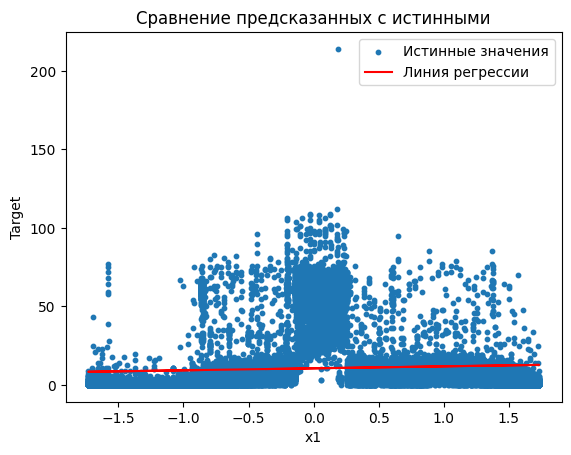

<Figure size 1000x800 with 0 Axes>

In [66]:
# Параметры размера точек и графика
point_size = 10
figure_size = (10, 8)

# Зависимость целевого столбца от конкретного столбца x1 (точечный график)
plt.scatter(X_c, y, s=point_size)

# Линейная регрессия
plt.plot(X_valid, predictions_valid, "r")


# Дополнительные параметры графика
plt.xlabel('x1')
plt.ylabel('Target')
plt.title('Сравнение предсказанных с истинными')
plt.legend(['Истинные значения', 'Линия регрессии'])
# Установка размеров графика
plt.figure(figsize=figure_size)


In [67]:
# Модель линейной регрессии не может предсказывать достаточно точно количество сообщений в течении суток

In [68]:
# ВТОРОЙ СПОСОБ НАХОЖДЕНИЯ ЛИНЕЙНОЙ РЕГРЕССИИ (БЕЗ ИСПОЛЬЗОВАНИЯ СПЕЦ. БИБЛИОТЕК)

In [69]:
df

,time,count_messages
0,00:00:00,0.0
1,00:00:01,1.0
2,00:00:02,0.0
3,00:00:03,6.0
4,00:00:04,7.0
...,...,...
86391,23:59:51,0.0
86392,23:59:52,0.0
86393,23:59:53,3.0
86394,23:59:54,1.0


In [70]:
y_array = np.array(y)  # Приведение в тип данных массив 

In [71]:
x_mean = np.mean(X_c)

In [72]:
y_mean = np.mean(y_array)

In [73]:
sqrt_x_array = np.array([x_i ** 2 for x_i in X_c])

In [74]:
mean_sqrt_x = np.mean(sqrt_x_array)

In [75]:
mean_sqrt_x

1.0

In [76]:
prod_x_y = np.array([x_i * y_i for x_i, y_i in zip(X_c, y_array)])

In [77]:
prod_x_y

array([[-0.        ],
       [-1.73199066],
       [-0.        ],
       ...,
       [ 5.19585171],
       [ 1.73199066],
       [ 1.73203076]])

In [78]:
mean_prod_x_y = np.mean(prod_x_y)

In [79]:
b = (y_mean * x_mean - mean_prod_x_y) / (x_mean ** 2 - mean_sqrt_x)

In [80]:
b

1.2809761050282296

In [81]:
a = y_mean - b * x_mean

In [82]:
a

10.582283902032502

In [83]:
# Коэфициенты линейной регресии почти совпадают с теми, которые расчитала модель

<Figure size 1000x800 with 0 Axes>

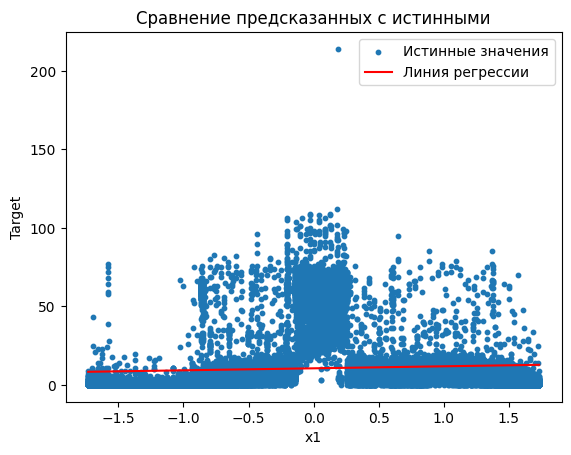

<Figure size 1000x800 with 0 Axes>

In [84]:
# Параметры размера точек и графика
point_size = 10
figure_size = (10, 8)

# Зависимость целевого столбца от конкретного столбца X (точечный график)
plt.scatter(X_c, y, s=point_size)

# Линейная регрессия
plt.plot(X_c, a + b * X_c, "r")


# Дополнительные параметры графика
plt.xlabel('x1')
plt.ylabel('Target')
plt.title('Сравнение предсказанных с истинными')
plt.legend(['Истинные значения', 'Линия регрессии'])
# Установка размеров графика
plt.figure(figsize=figure_size)

In [85]:
y_predicted = np.array([a + b * x for x in X_c])

In [86]:
MSE_model2 = sum(np.array([(y - y_pred)** 2 for y, y_pred in zip(y_array, y_predicted)])) / 86396

In [87]:
MSE_model2

array([365.39799141])

In [88]:
''' ВЫВОДЫ О КАЧЕСТВЕ МОДЕЛЕЙ
Значение MSE первой модели (с помощью библиотеки scikit-learn) -  367.115
Значение MSE первой модели(с помощью метода наименьших квадратов - система линейных уравнений) - 365.398 

Исходя из предоставленных значений MSE (Mean Squared Error), можно сделать вывод, 
что вторая модель имеет незначительно меньшее значение MSE (365.398)
по сравнению с первой моделью (367.115).

Вторая модель имеет более низкую ошибку прогнозирования и,
скорее всего, может быть чуть более точной для данного набора данных по сравнению с первой моделью
'''

' ВЫВОДЫ О КАЧЕСТВЕ МОДЕЛЕЙ\nЗначение MSE первой модели (с помощью библиотеки scikit-learn) -  367.115\nЗначение MSE первой модели(с помощью метода наименьших квадратов - система линейных уравнений) - 365.398 \n\nИсходя из предоставленных значений MSE (Mean Squared Error), можно сделать вывод, \nчто вторая модель имеет незначительно меньшее значение MSE (365.398)\nпо сравнению с первой моделью (367.115).\n\nВторая модель имеет более низкую ошибку прогнозирования и,\nскорее всего, может быть чуть более точной для данного набора данных по сравнению с первой моделью\n'